In [2]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.time_utils import TimeProcessorSDPA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_mm = TimeProcessorSDPA(base_dir)
df = time_processor_mm.get_data(sample_rate=0.7)

In [4]:
df

,kernel_params,dtype,backend,b,h,s_q,s_kv,d_qk,d_v,is_causal,time,gflops
0,b16.flash.4.4.512.512.144.144.0,b16,flash,4,4,512,512,144,144,0,0.044032,2.415919
1,b16.flash.2.4.8.512.80.80.0,b16,flash,2,4,8,512,80,80,0,0.031744,0.010486
2,b16.flash.32.4.64.64.240.240.1,b16,flash,32,4,64,64,240,240,1,0.033792,0.503316
3,b16.flash.16.4.128.64.224.224.0,b16,flash,16,4,128,64,224,224,0,0.027136,0.469762
4,b16.flash.16.4.32.32.240.240.0,b16,flash,16,4,32,32,240,240,0,0.026624,0.062915
...,...,...,...,...,...,...,...,...,...,...,...,...
99723,32.efficient.16.16.512.256.256.128.1,32,efficient,16,16,512,256,256,128,1,0.942592,25.769804
99724,32.efficient.128.16.512.512.128.64.0,32,efficient,128,16,512,512,128,64,0,10.820096,206.158430
99725,32.efficient.8.16.512.256.32.128.0,32,efficient,8,16,512,256,32,128,0,0.281600,5.368709
99726,32.efficient.2.16.128.512.128.256.0,32,efficient,2,16,128,512,128,256,0,0.132096,1.610613


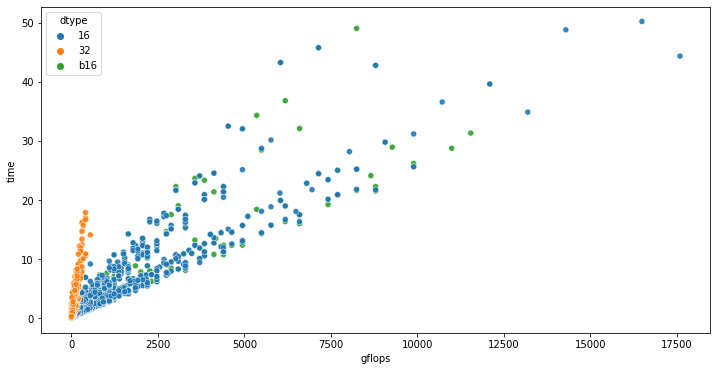

In [5]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.9, data=df)
plt.show()

32---------------------------------------


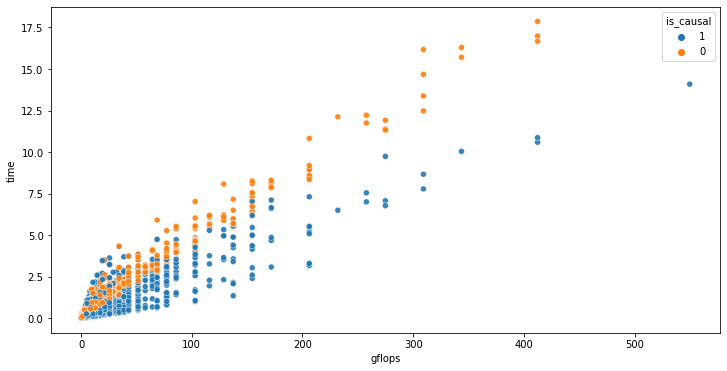

b16---------------------------------------


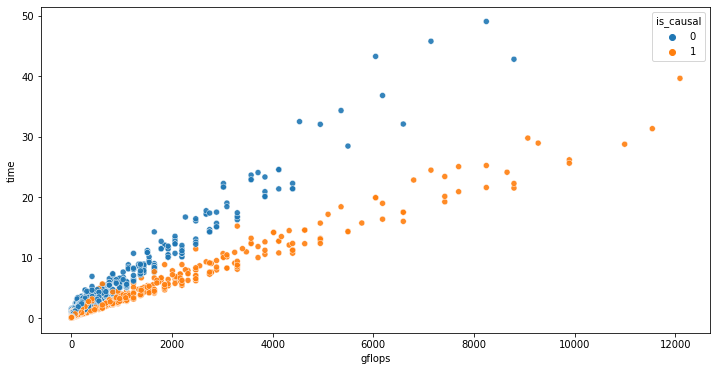

16---------------------------------------


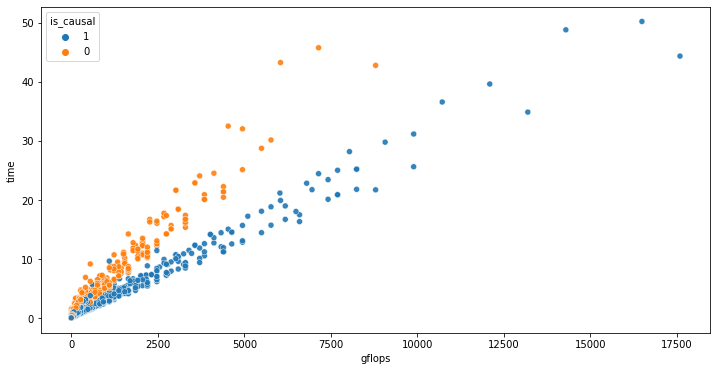

In [6]:
for dtype in ["32", "b16", "16"]:
    print(f"{dtype}---------------------------------------")
    plt.figure(figsize=(12,6))
    sns.scatterplot(x="gflops", y="time", hue="is_causal", alpha=0.9, data=df.query(f"dtype == '{dtype}'"))
    plt.show()

dtype: 32. is_causal: 0---------------------


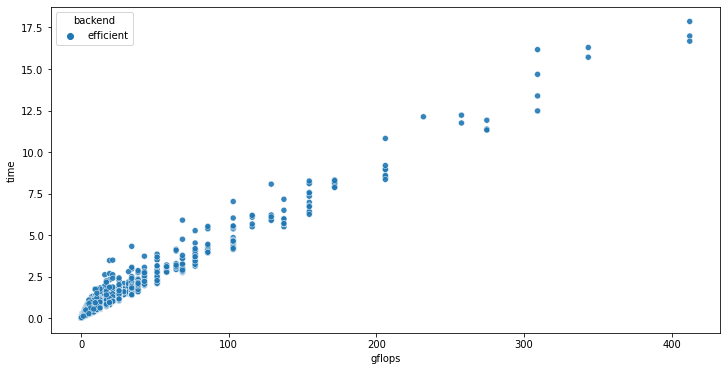

dtype: 32. is_causal: 1---------------------


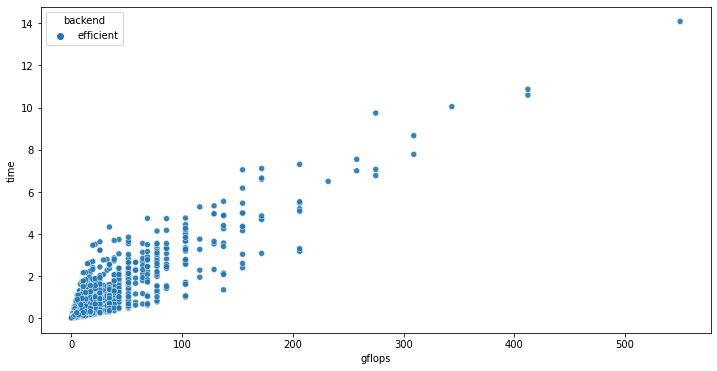

dtype: b16. is_causal: 0---------------------


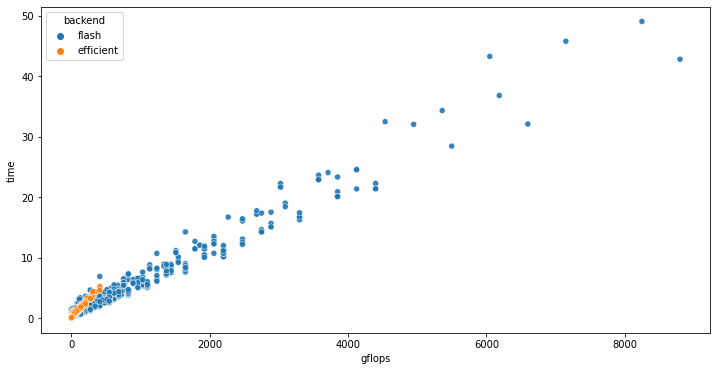

dtype: b16. is_causal: 1---------------------


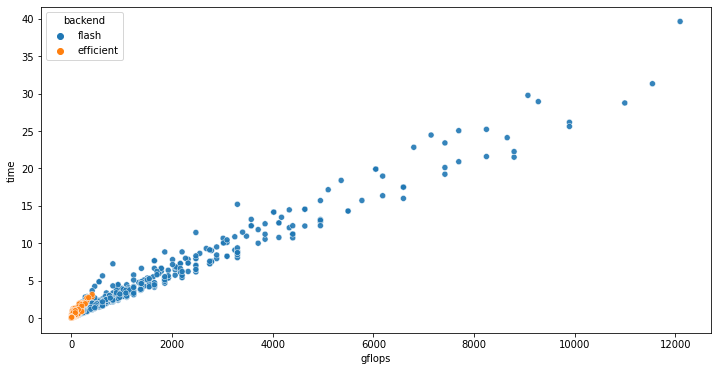

dtype: 16. is_causal: 0---------------------


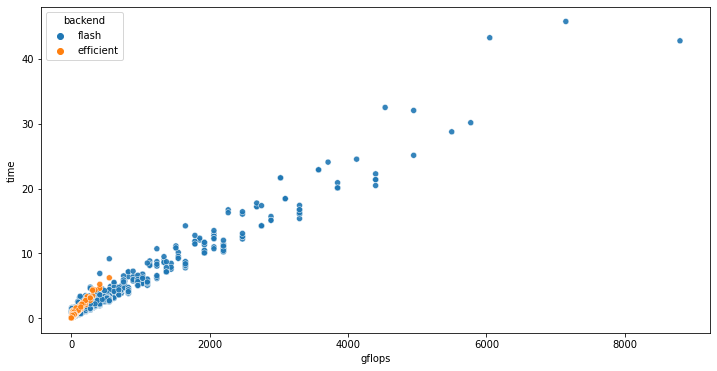

dtype: 16. is_causal: 1---------------------


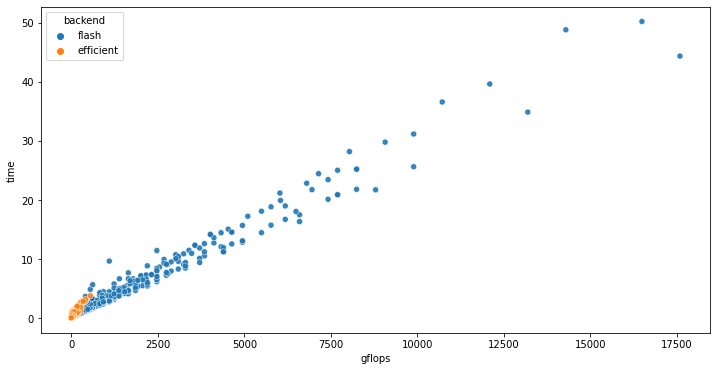

In [7]:
for dtype in ["32", "b16", "16"]:
    for is_causal in [0, 1]:
        print(f"dtype: {dtype}. is_causal: {is_causal}---------------------")
        plt.figure(figsize=(12,6))
        sns.scatterplot(x="gflops", y="time", hue="backend", alpha=0.9, data=df.query(f"dtype == '{dtype}' and is_causal == '{is_causal}'"))
        plt.show()